In [4]:
import networkx as nx
import matplotlib.pyplot as plt

OUTPUT_DIR = "dossiers_git"

'''
todo:
commentaires

stats:
- définir les intervalles étoiles intéresent,
- distribution des degrés entrants et degrés sortants et distribution totale
[0, 5, 10], 0 degré 1, 5, degré 2, 10, degré 3..., (3 listes), (by networkX, degree_centrality)
distribution : [0, 5, 10]/3
les puits : noeuds sortant degré 0,
ratio merge/commit
ratio merge/total_noeuds
ratio commit/total_noeuds
autres...
'''

def load_graph(file_path):
    graph = nx.read_edgelist(file_path, create_using=nx.DiGraph())
    return graph

def show_graph(graph):
    print(graph)
    plt.figure(figsize=(5, 55))
    pos = nx.nx_pydot.pydot_layout(graph, prog='dot')
    labels = {node: node[:7] for node in graph.nodes}
    nodeColors = [
        "red" if len(list(graph.predecessors(node))) > 1 else "lightblue" 
        for node in graph.nodes
    ]

    nx.draw(graph, pos, labels=labels, font_size=8, node_color= nodeColors)


    plt.title("Commit Graph")
    plt.show()

g_test = load_graph("dossiers_git/graphs/0-10/33964408")

In [6]:
def degree_entrant(G, normalize:bool = False):
    vals = dict(G.in_degree()).values()
    m = max(vals)
    L = [0]*(m+1)
    for val in vals:
        L[val]+=1
    
    if normalize:
        s=sum(L)
        for i in range(m):
            L[i]/=s

    return L

def degree_sortant(G, normalize:bool = False):
    vals = dict(G.out_degree()).values()
    m = max(vals)
    L = [0]*(m+1)
    for val in vals:
        L[val]+=1

    if normalize:
        s=sum(L)
        for i in range(m):
            L[i]/=s

    return L

def degree_total(G, normalize:bool = False):
    vals = dict(G.degree()).values()
    m = max(vals)
    L = [0]*(m+1)
    for val in vals:
        L[val]+=1

    if normalize:
        s=sum(L)
        for i in range(m):
            L[i]/=s

    return L

def nb_merge(G):
    c = 0
    for node in G.nodes:
        if len(list(G.predecessors(node))) > 1:
            c+=1
    return c

def nb_commit(G):
    return G.number_of_nodes()

print(degree_entrant(g_test), degree_sortant(g_test), degree_total(g_test),
       nb_merge(g_test), nb_commit(g_test))

[3, 9847, 1448, 316, 106, 52, 37, 14, 16, 9, 5, 0, 3, 1, 2, 1, 1, 1, 1] [3, 8623, 3237] [0, 6, 7500, 3169, 792, 201, 78, 42, 29, 16, 11, 6, 3, 2, 1, 3, 0, 1, 1, 2] 2013 11863


In [8]:
import os


def get_by_star(stars:str, fun):
    #graphs_path = os.path.join(OUTPUT_DIR, "graphs")
    #info_star_folders = [f for f in os.listdir(graphs_path) if os.path.isdir(os.path.join(graphs_path, f))]


    star_path = os.path.join(OUTPUT_DIR, "graphs",stars)

    graphs_files = [f for f in os.listdir(star_path)]

    return [fun(load_graph(os.path.join(star_path, file))) for file in graphs_files]


get_by_star("0-10", nb_commit)

[52, 11863, 15, 3, 55, 8, 9, 7, 30, 7]

In [9]:
def ratio_merge_commit(stars:str):
    merges = sum(get_by_star(stars, nb_merge))
    commits= sum(get_by_star(stars, nb_commit))
    return merges/commits


ratio_merge_commit("50-100")

0.06683804627249357

In [10]:
def get_graphs(fun):
    graphs_path = os.path.join(OUTPUT_DIR, "graphs")
    info_stars_folders = [f for f in os.listdir(graphs_path) if os.path.isdir(os.path.join(graphs_path, f))]
    return [fun(stars) for stars in info_stars_folders], info_stars_folders

get_graphs(ratio_merge_commit)

([0.1672337953357125,
  0.046686746987951805,
  0.06330806954971022,
  0.06683804627249357,
  0.13423305761137716],
 ['0-10', '10-50', '100-500', '50-100', '500-1000'])

In [11]:
import matplotlib.pyplot as plt

def show_chart(fun):
    l = get_graphs(fun)
    plt.bar(l[1], l[0])
    plt.xlabel("Range")
    plt.ylabel("Value")
    plt.title("Bar Chart")
    plt.show()

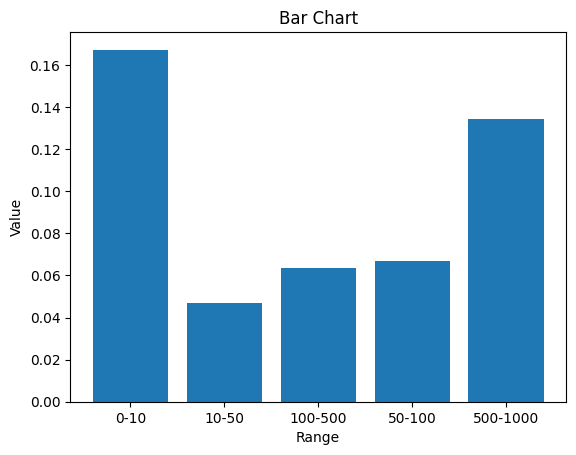

In [25]:
show_chart(ratio_merge_commit)

In [14]:
get_by_star("0-10",degree_entrant)

[[1, 51],
 [3, 9847, 1448, 316, 106, 52, 37, 14, 16, 9, 5, 0, 3, 1, 2, 1, 1, 1, 1],
 [1, 13, 1],
 [1, 2],
 [1, 53, 1],
 [1, 7],
 [1, 8],
 [1, 6],
 [1, 29],
 [1, 6]]

In [ ]:
show_graph(g_test)

DiGraph with 11863 nodes and 15097 edges
